In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv(r"E:\ELEVATE LABS\TASK - 6\IRIS.csv")
X = df.drop("Species", axis=1)
y = df["Species"]

In [3]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [6]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_pca, y_encoded)

KNeighborsClassifier(n_neighbors=3)

In [7]:
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [8]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

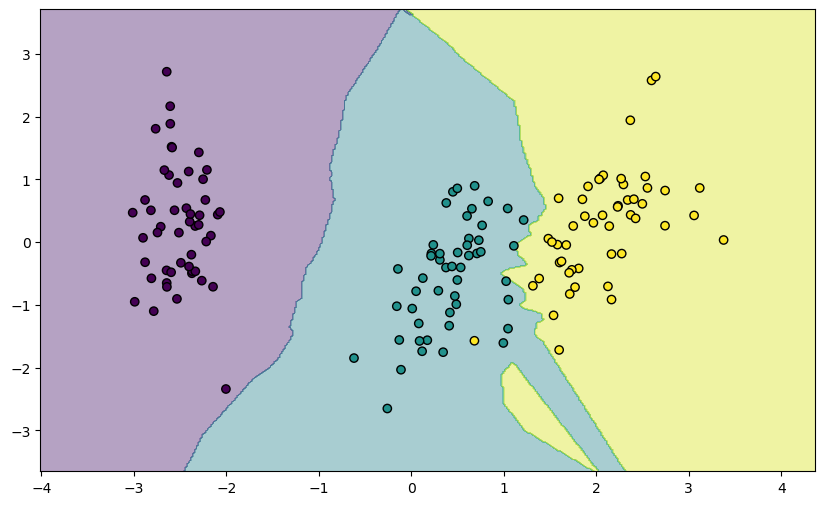

In [9]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, edgecolor='k', cmap='viridis')